## plot histogram

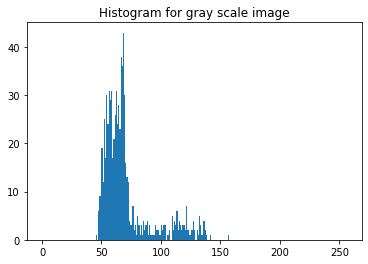

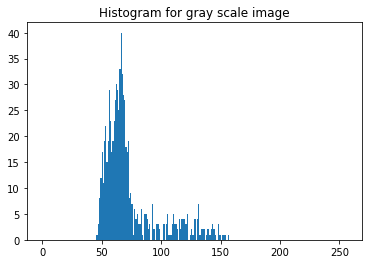

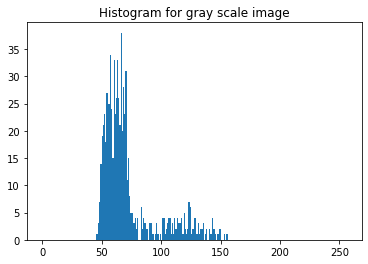

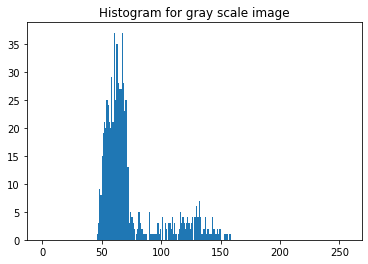

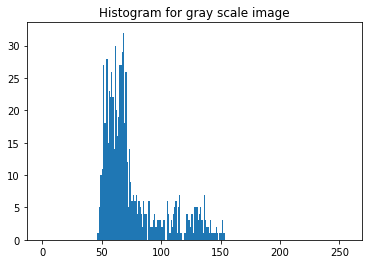

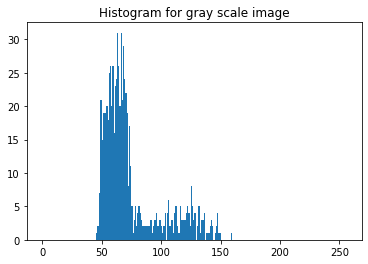

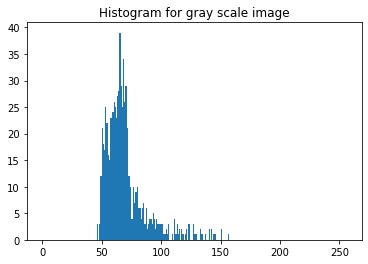

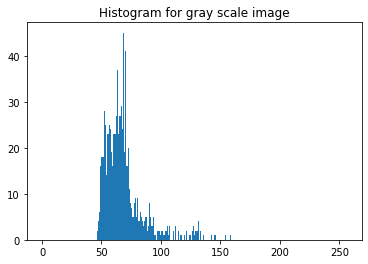

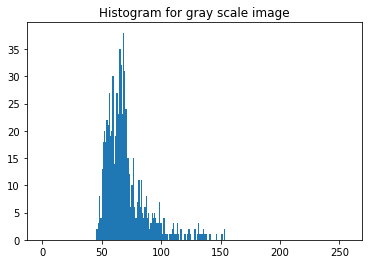

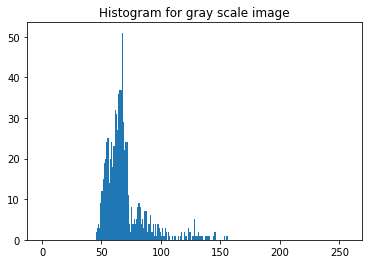

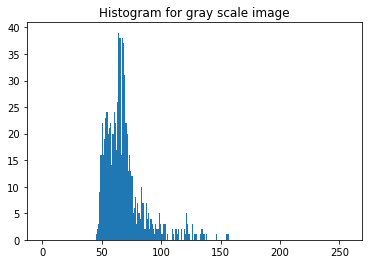

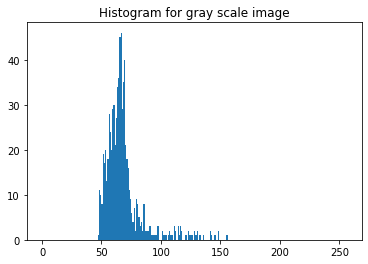

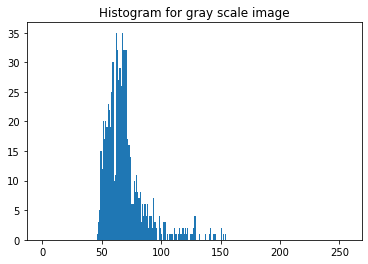

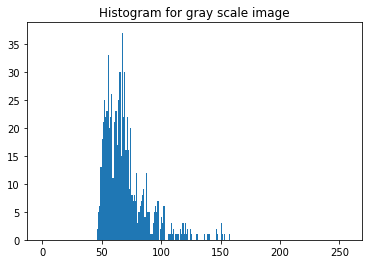

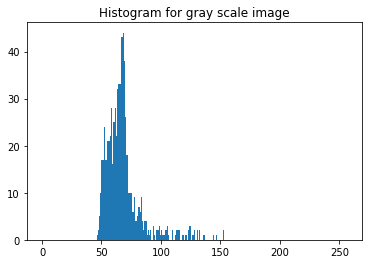

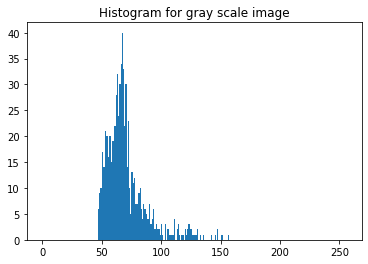

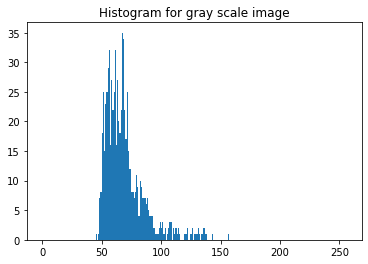

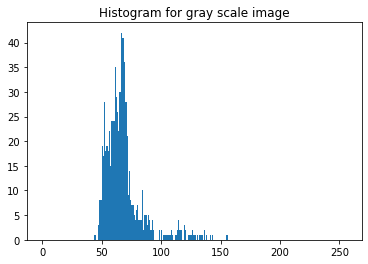

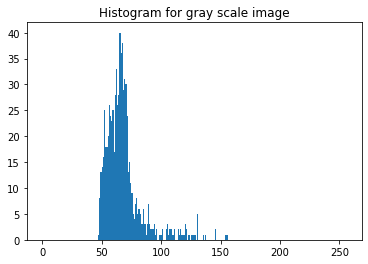

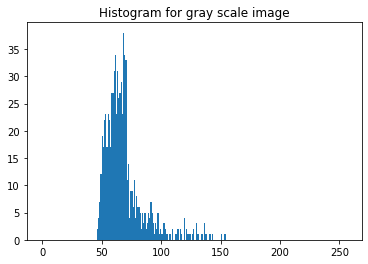

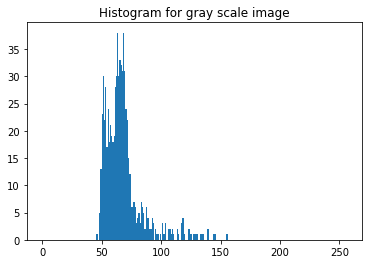

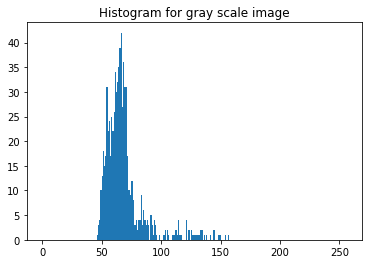

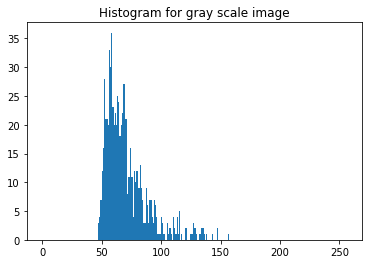

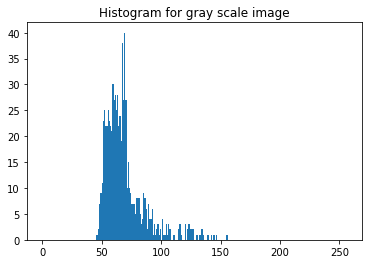

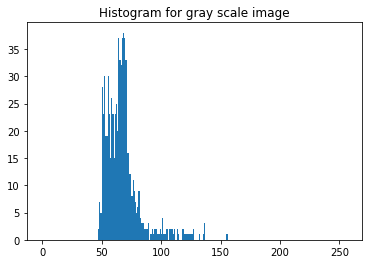

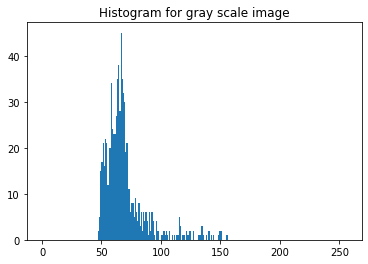

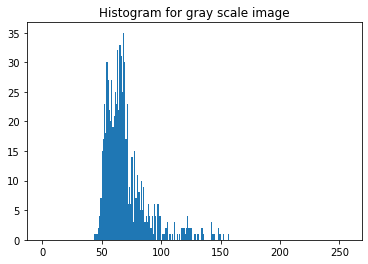

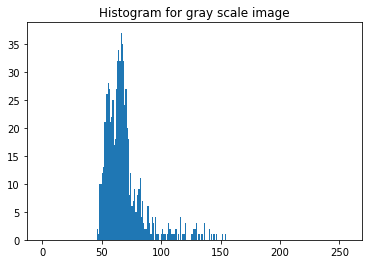

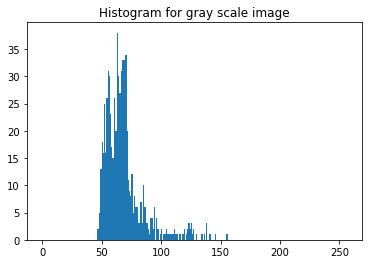

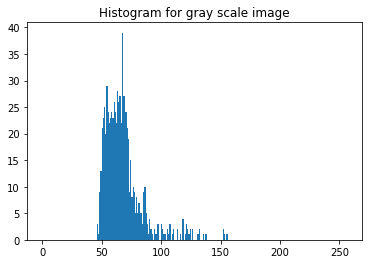

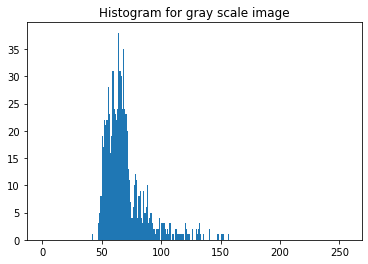

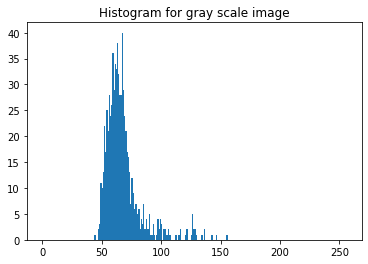

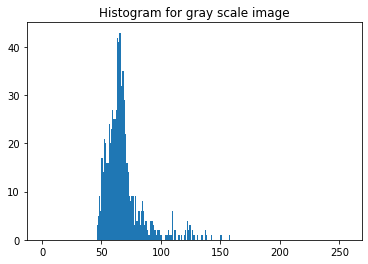

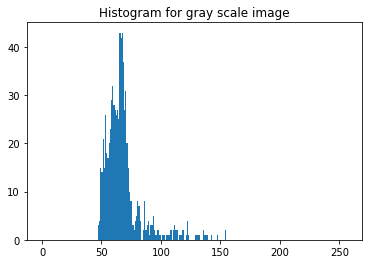

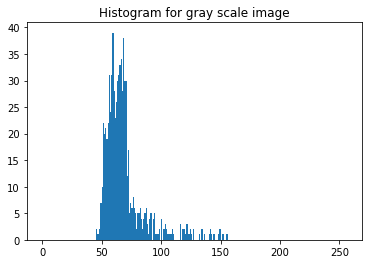

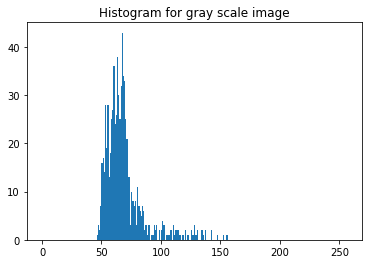

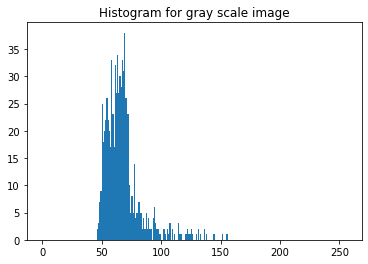

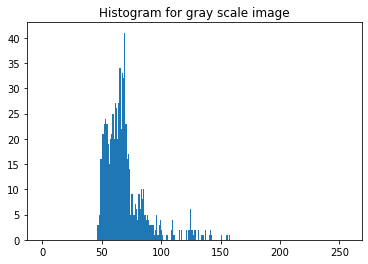

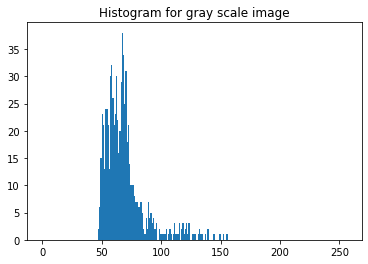

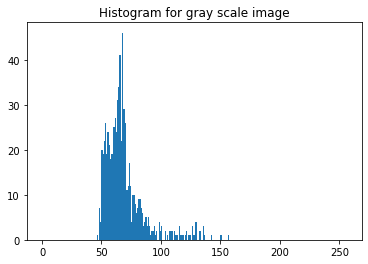

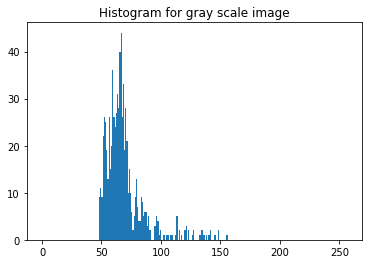

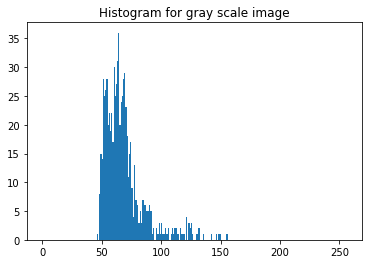

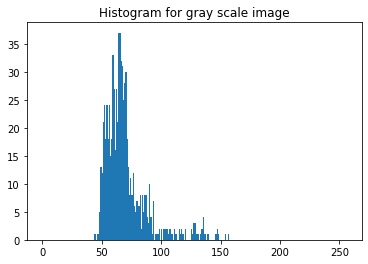

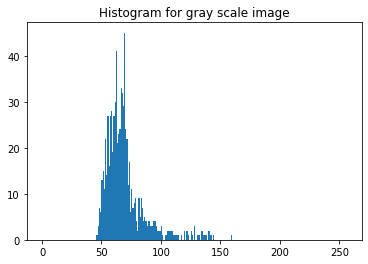

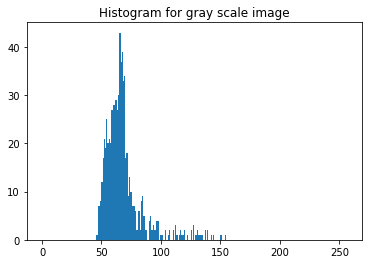

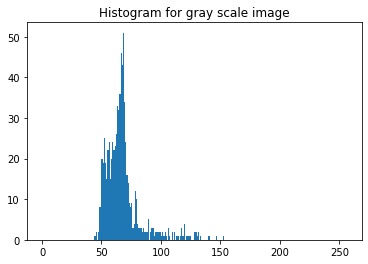

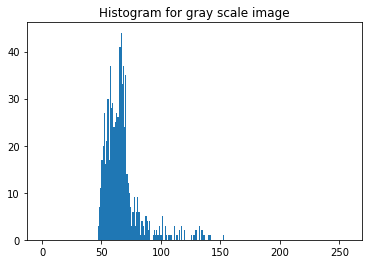

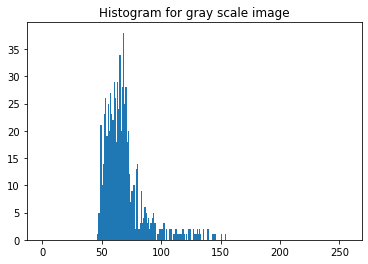

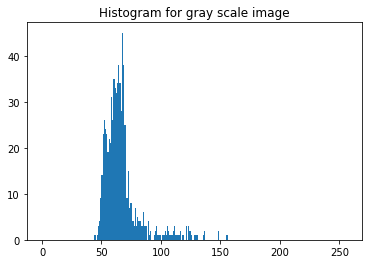

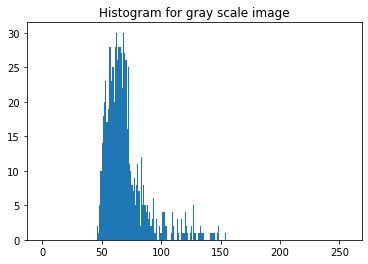

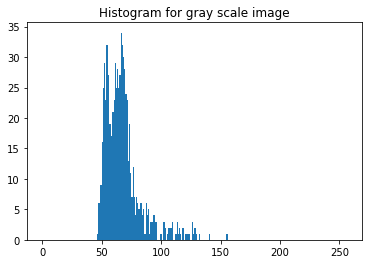

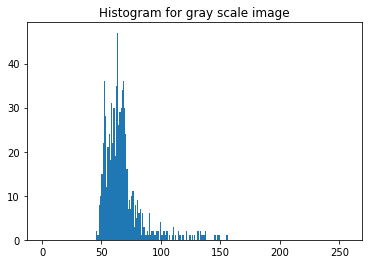

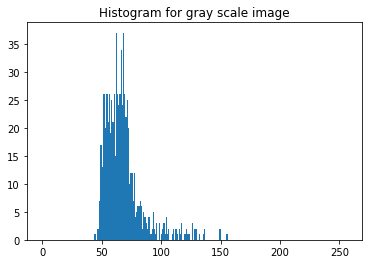

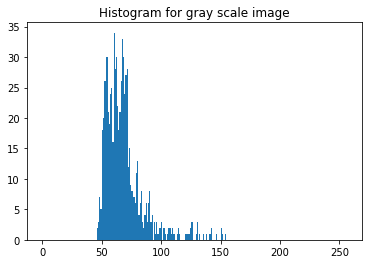

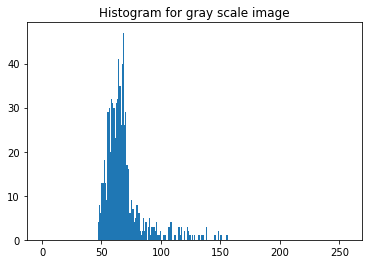

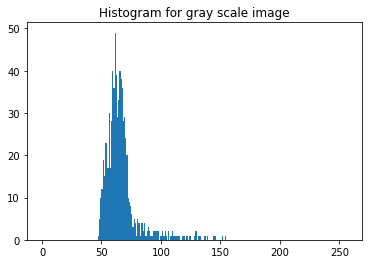

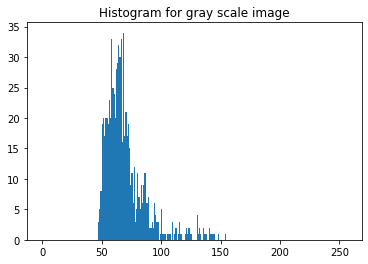

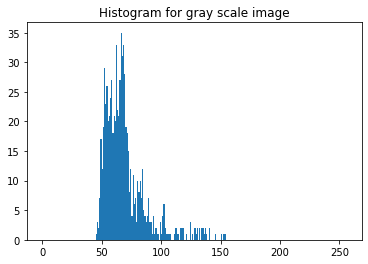

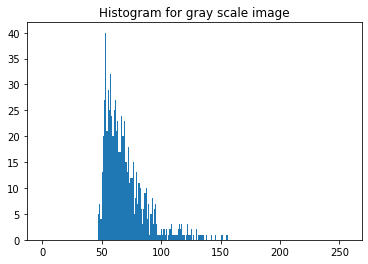

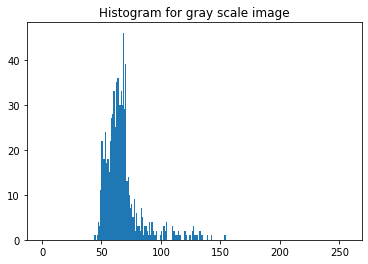

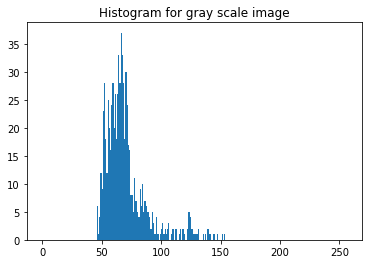

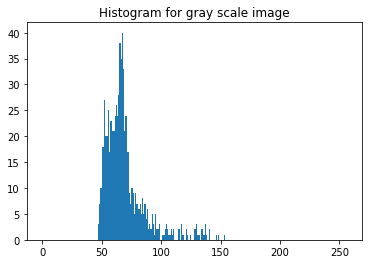

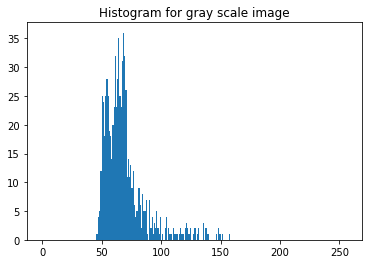

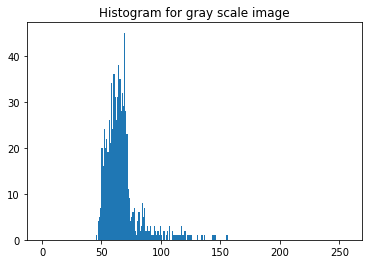

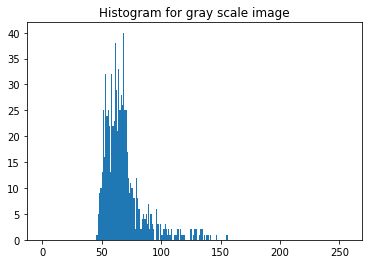

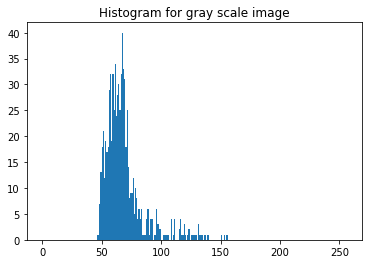

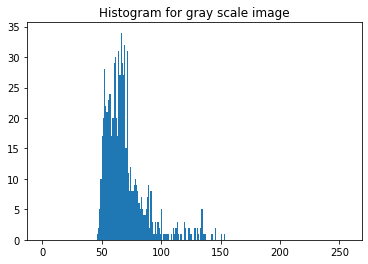

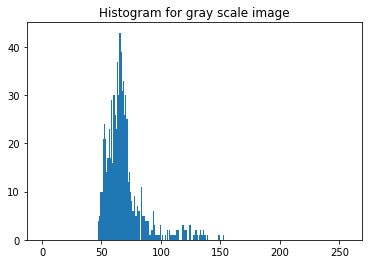

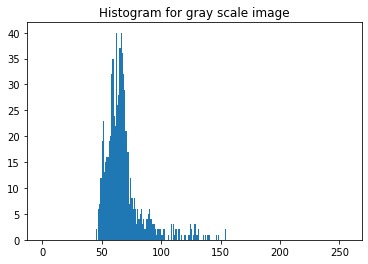

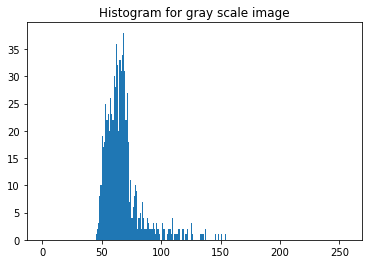

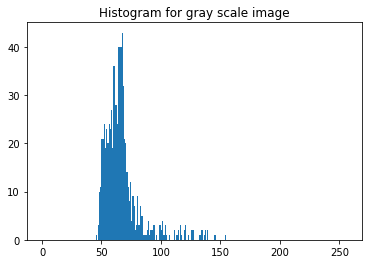

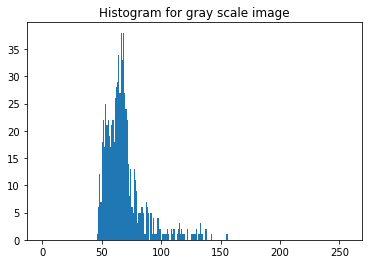

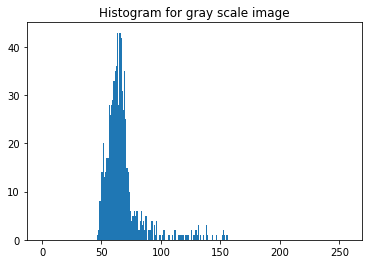

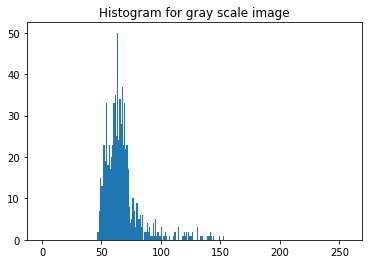

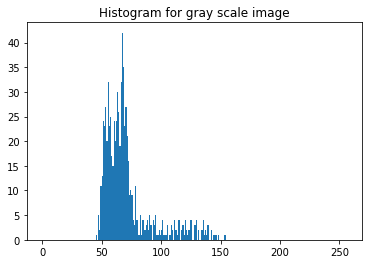

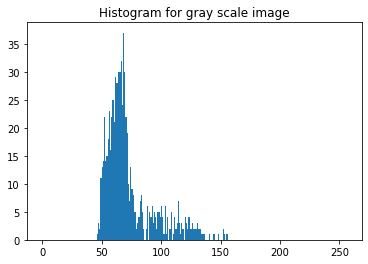

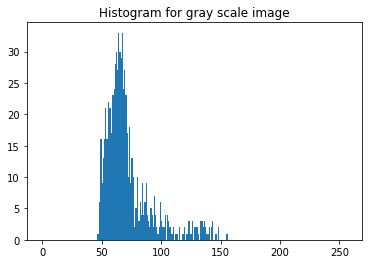

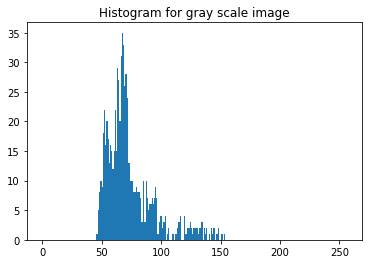

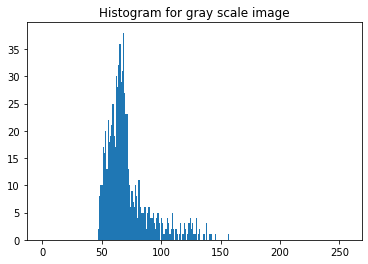

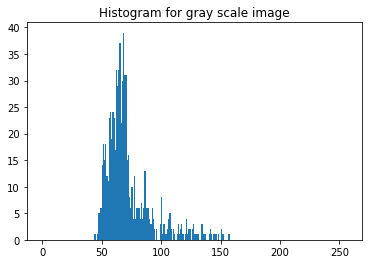

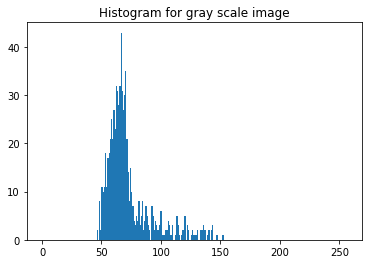

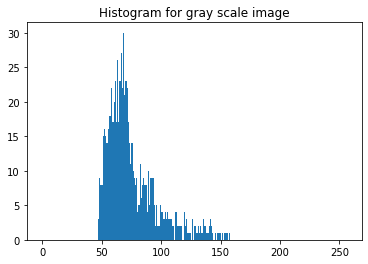

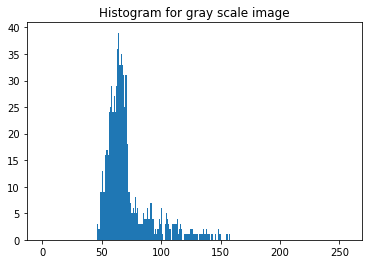

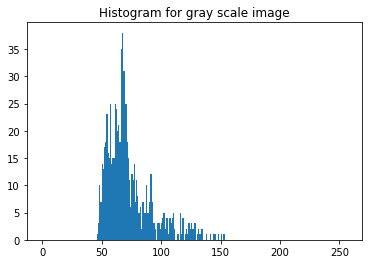

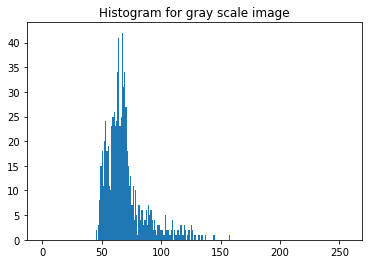

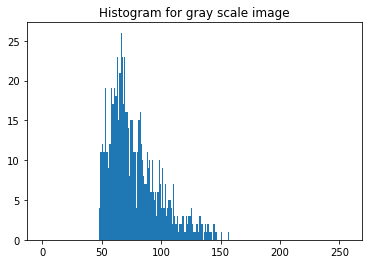

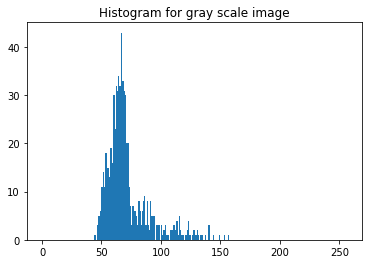

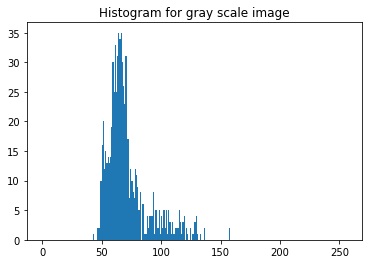

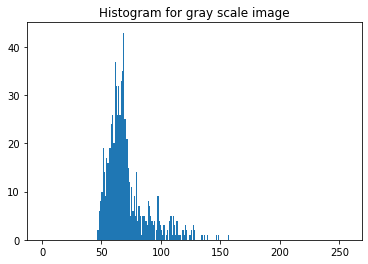

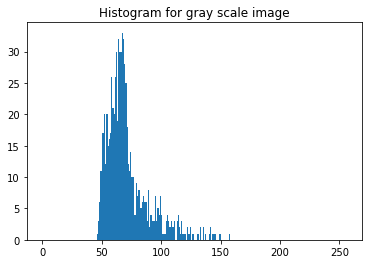

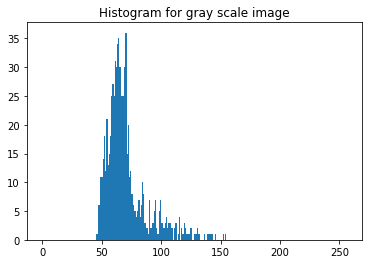

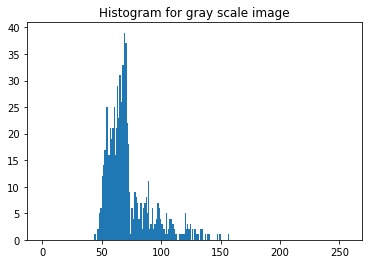

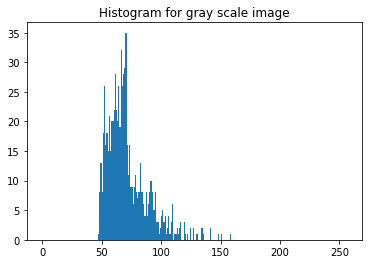

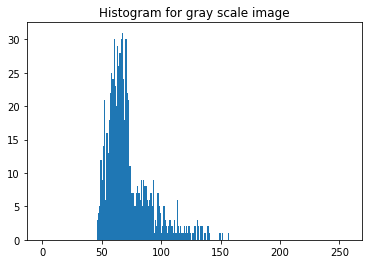

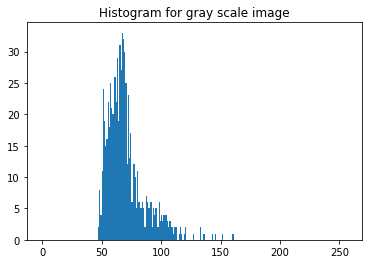

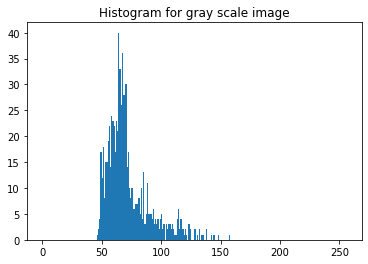

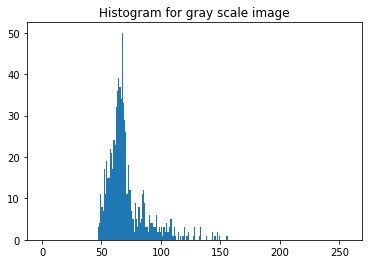

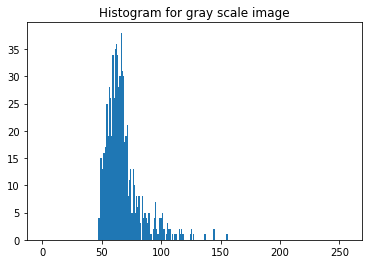

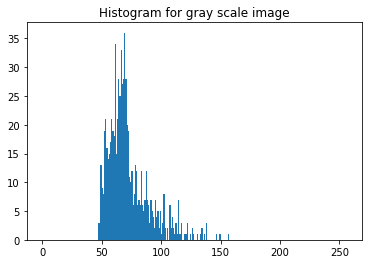

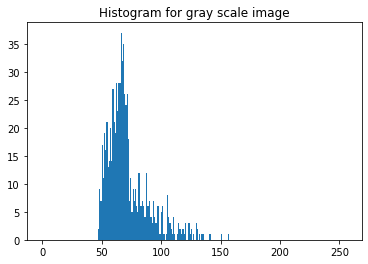

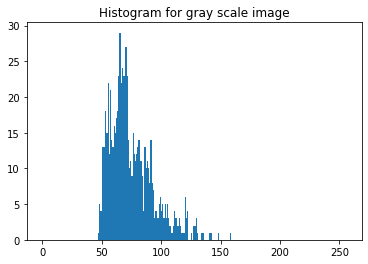

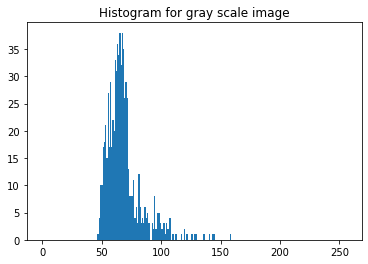

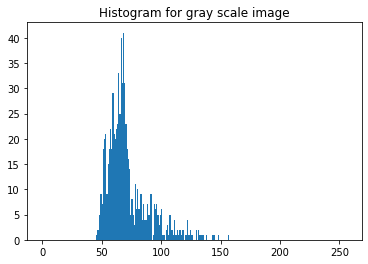

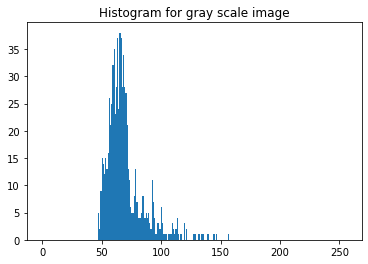

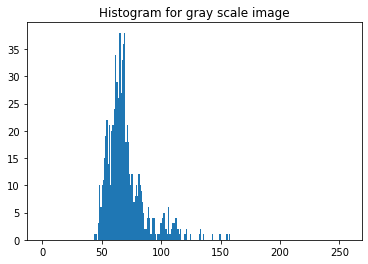

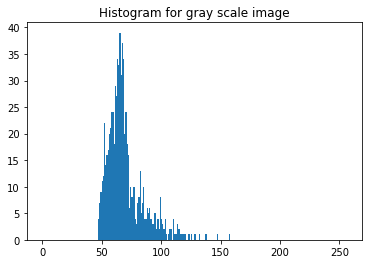

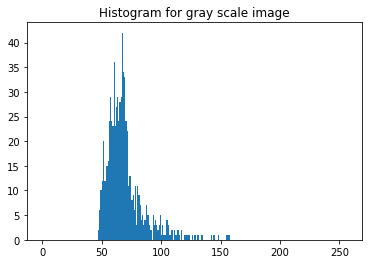

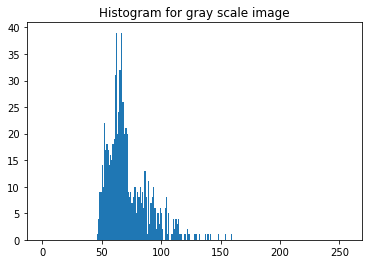

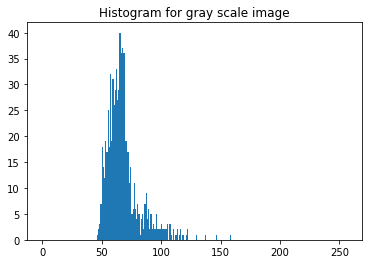

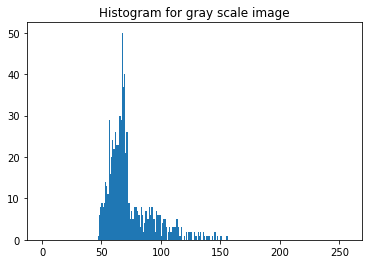

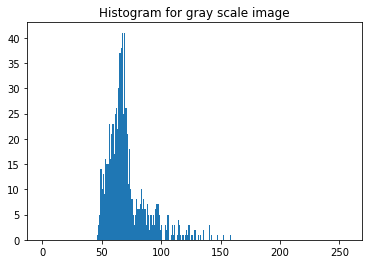

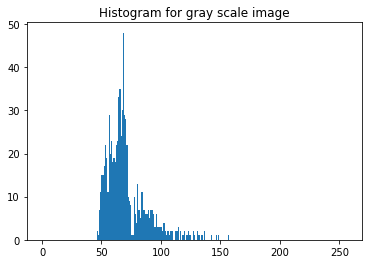

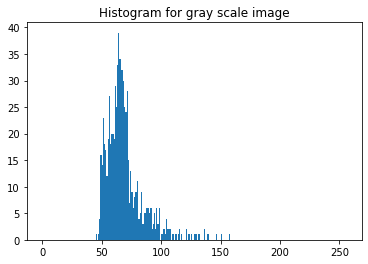

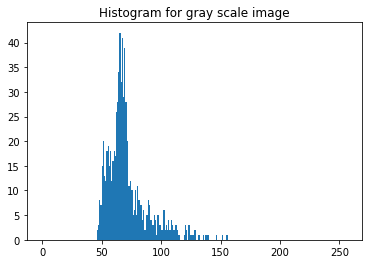

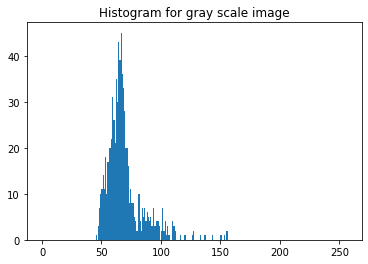

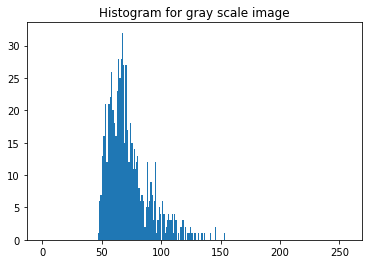

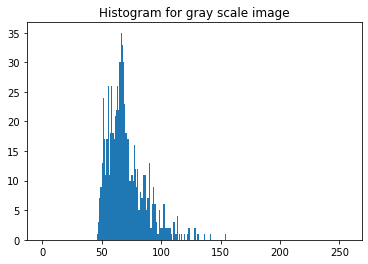

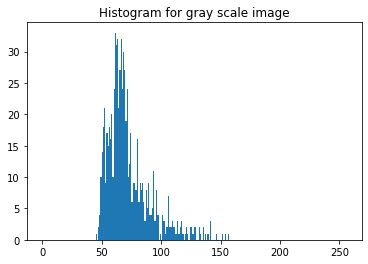

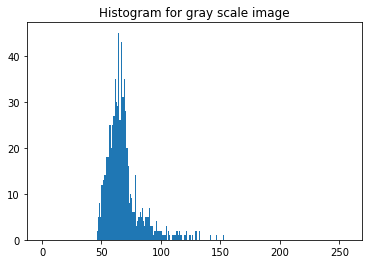

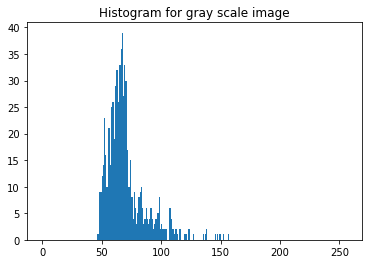

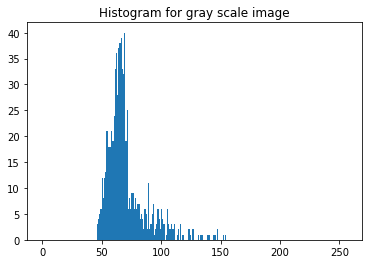

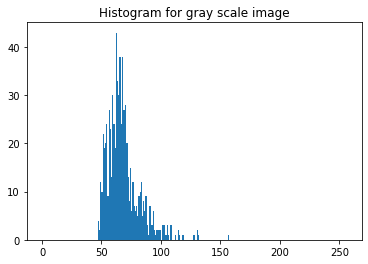

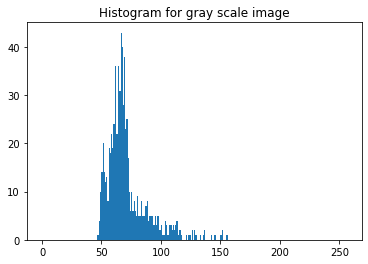

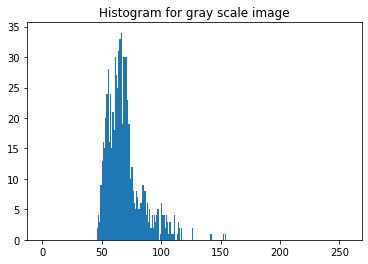

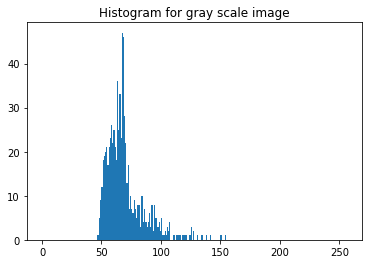

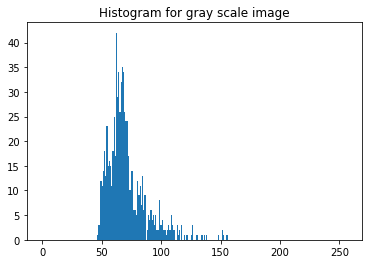

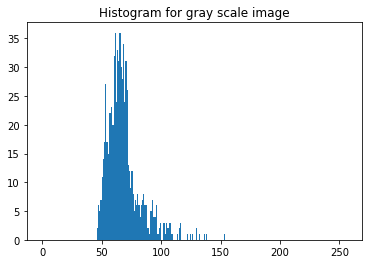

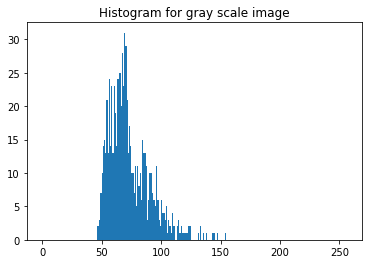

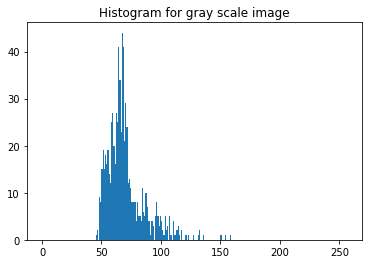

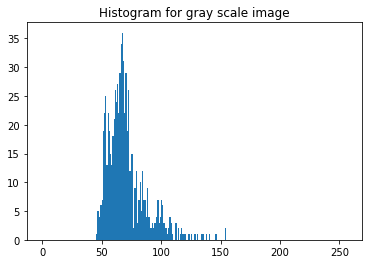

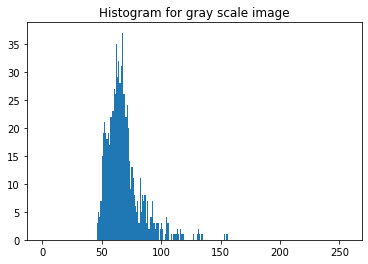

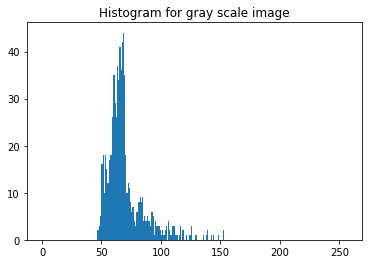

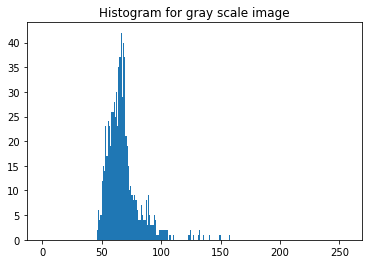

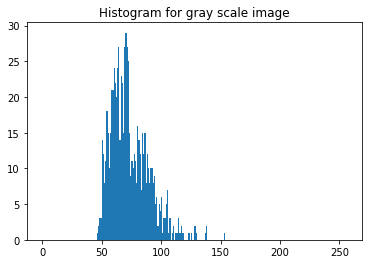

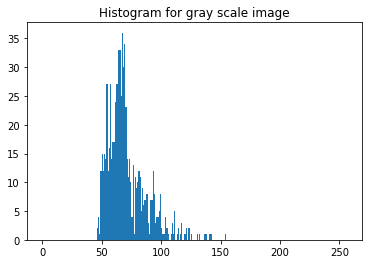

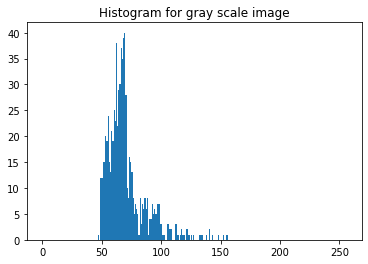

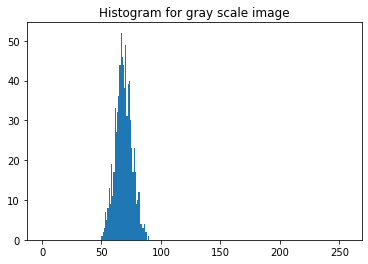

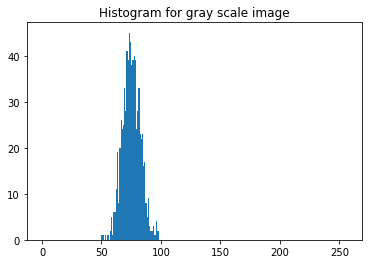

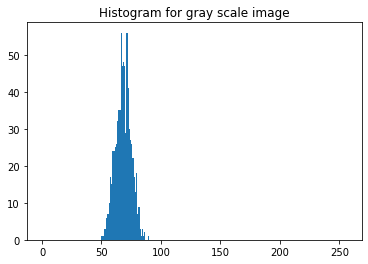

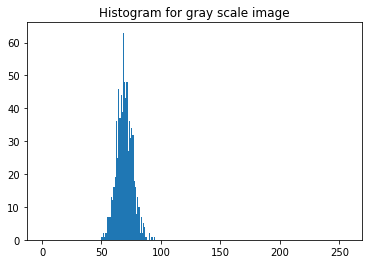

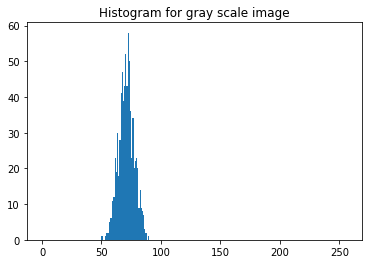

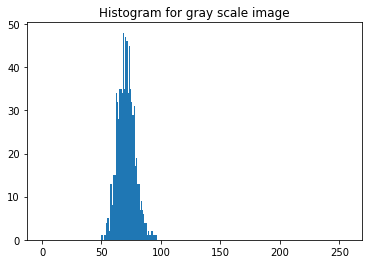

In [1]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt


directory_name = r"D:\test6\october"



for filename in os.listdir(directory_name):

    img = cv2.imread(directory_name + "/" + filename,0)
    
    dst = cv2.calcHist(img, [0], None, [256], [0,256])

    plt.hist(img.ravel(),256,[0,256])
    plt.title('Histogram for gray scale image')
    plt.show()

In [ ]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt


directory_name = r"D:\test6\magic_o"



for filename in os.listdir(directory_name):

    img = cv2.imread(directory_name + "/" + filename,0)
    
    dst = cv2.calcHist(img, [0], None, [256], [0,256])

    plt.hist(img.ravel(),256,[0,256])
    plt.title('Histogram for gray scale image')
    plt.show()


    #cv2.imwrite(after_path+"/"+filename,image)
  

## try moving

### all min pixel start from 50

In [ ]:
import cv2
import numpy as np

img = cv2.imread(r"D:\Dementia_Data_Preprocessing\testing_data\20211023\all_magic_eraser\20211023_t130426.jpg",0)
img_copy = img.copy()

min_pixel = 50

shape = img.shape
ymax = shape[0]
xmax = shape[1]
all_pixel = []


for i in range(ymax):   
    for j in range(xmax):
        
        now_pixel = int(img[i][j])
        
        all_pixel.append(now_pixel)


find_min = min(all_pixel)    
print(find_min)

In [ ]:
smallest = np.amin(img)
print(smallest)
biggest = np.amax(img)

In [ ]:
moving_d = find_min - min_pixel
print(moving_d)

In [ ]:
for i in range(ymax):   
    for j in range(xmax):
        
        now_pixel = int(img[i][j])
        img_copy[i][j] = int(now_pixel-moving_d)

cv2.imwrite(r"D:\b.jpg",img_copy)

## run path

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


# 修改路徑
directory_name = r'D:\test4\august'
new_directory_name = r'D:\test5\august'
min_pixel = 50


for filename in os.listdir(directory_name):

    img = cv2.imread(directory_name + "/" + filename,0)
    img_copy = img.copy()
    shape = img.shape
    ymax = shape[0]
    xmax = shape[1]
    
    all_pixel = []
    for i in range(ymax):   
        for j in range(xmax):

            now_pixel = int(img[i][j])
            all_pixel.append(now_pixel)
            
    find_min = min(all_pixel)
    moving_d = find_min - min_pixel
    
    for i in range(ymax):   
        for j in range(xmax):

            now_pixel = int(img[i][j])
            img_copy[i][j] = int(now_pixel-moving_d)
            
    cv2.imwrite(new_directory_name + "/" + filename, img_copy)



## try mapping

### mapping to 50~155

In [ ]:
def linear_mapping(x,xmin,xmax,ymin,ymax):
    final = (((ymax-ymin)/(xmax-xmin))*(x-xmin))+ymin
    final = int(final)
    return final

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


# 修改路徑
directory_name = r'D:\b'
new_directory_name = r'D:\bb'

bmin = 50
bmax = 155
person_min = 70
abscent_threshold = 9


for filename in os.listdir(directory_name):
    p = []
    print(filename)
    img = cv2.imread(directory_name + "/" + filename,0)
    arr = np.array(img)
    arr2 = arr.flatten()
    stdev = np.std(arr2, ddof=1)
    if stdev <= abscent_threshold:
        cv2.imwrite(new_directory_name + "/" + filename, img)
        continue
        
    img_copy = img.copy()
    shape = img.shape
    ymax = shape[0]
    xmax = shape[1]
    
    for i in range(ymax):   
        for j in range(xmax):
            now_pixel = int(img[i][j])
            if now_pixel > person_min:
                p.append(now_pixel)
       
    amin = min(p)
    amax = max(p)

    print(amin,amax)

    for i in range(ymax):   
        for j in range(xmax):
            a = int(img[i][j])
            if a > person_min:
                new = linear_mapping(a,amin,amax,bmin,bmax)
                img_copy[i][j] = new
            #print(f"{a}=>{new}")
    cv2.imwrite(new_directory_name + "/" + filename, img_copy)
                
    
        
                
    
   

## start run all

### pixel moving => pixel mapping 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def linear_mapping(x,xmin,xmax,ymin,ymax):
    final = (((ymax-ymin)/(xmax-xmin))*(x-xmin))+ymin
    final = int(final)
    return final


# 修改路徑
directory_name = r'D:\Dementia_Data_Preprocessing\testing_data\test_system\out'
new_directory_name = r'D:\Dementia_Data_Preprocessing\testing_data\test_system\out2'

# moving parameter
min_pixel = 50

# mapping parameter
bmin = 50
bmax = 155
person_min = 70
abscent_threshold = 9


for filename in os.listdir(directory_name):

    img = cv2.imread(directory_name + "/" + filename,0)
        
    arr = np.array(img)
    arr2 = arr.flatten()    
    stdev = np.std(arr2, ddof=1)
    
    find_min = np.amin(img)   
    find_max = np.amax(img)
    moving_d = find_min - min_pixel
    final = img - moving_d
    img_copy = final.copy()
    
    if stdev <= abscent_threshold:        
        cv2.imwrite(new_directory_name + "/" + filename, final)
        continue    

    p = final[final > person_min]        
    amin = min(p)
    amax = max(p)
        
    shape = final.shape
    ymax = shape[0]
    xmax = shape[1]
    
    for i in range(ymax):   
        for j in range(xmax):
            a = int(final[i][j])       
            if a > person_min:
                new = linear_mapping(a,amin,amax,bmin,bmax)
                img_copy[i][j] = new
            #print(f"{a}=>{new}")
    cv2.imwrite(new_directory_name + "/" + filename, img_copy)
            


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def linear_mapping(x,xmin,xmax,ymin,ymax):
    final = (((ymax-ymin)/(xmax-xmin))*(x-xmin))+ymin
    final = int(final)
    return final


def unify_contrast(img,min_pixel,bmin,bmax,person_min,abscent_threshold):
        
    arr = np.array(img)
    arr2 = arr.flatten()    
    stdev = np.std(arr2, ddof=1)    
    find_min = np.amin(img)   
    find_max = np.amax(img)
    moving_d = find_min - min_pixel
    final = img - moving_d
    img_copy = final.copy()
    
    if stdev <= abscent_threshold:    
        return final 
    else:
        p = final[final > person_min]        
        amin = min(p)
        amax = max(p)

        shape = final.shape
        ymax = shape[0]
        xmax = shape[1]

        for i in range(ymax):   
            for j in range(xmax):
                a = int(final[i][j])       
                if a > person_min:
                    new = linear_mapping(a,amin,amax,bmin,bmax)
                    img_copy[i][j] = new
                    
        return img_copy